<h1 style="text-align: center; color: navy; font-family: 'Arial Black', Gadget, sans-serif;">
    Análisis Estadístico de las Tarifas Surf y Ultimate en Megaline: Evaluación de Ingresos y Comportamiento del Cliente en 2018
</h1>

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
    * [Conclusiones](#data_review_conclusions)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [2.1 Valores Duplicados](#duplicates)
    * [2.2 Valores ausentes](#missing_values)
    * [2.3 Tipos de datos](#data_type)
    * [2.4 Conclusiones](#data_preprocessing_conclusions)
* [Etapa 3. Análisis de los datos](#data_analyst)
    * [3.1 Extracción de consumo por usuario](#extractions)
    * [3.1 Llamadas](#calls)
    * [3.2 Mensajes](#messages)
    * [3.3 Internet por Gb](#internet)
    * [3.4 Ingresos totales](#income)
    * [3.5 Conclusiones](#conclusions)
* [Etapa 4. Prueba de Hipótesis](#data_hypotesis)  
* [Conclusiones finales del proyecto](#final_conclusion)

## Introducción <a id='intro'></a>

En este proyecto, trabajamos como analista para Megaline, un operador de telecomunicaciones que ofrece dos tarifas de prepago a sus clientes: Surf y Ultimate. El objetivo principal del análisis es determinar cuál de las dos tarifas genera más ingresos para la empresa, proporcionando información valiosa al departamento comercial para ajustar el presupuesto de publicidad de manera eficiente.

Para llevar a cabo este análisis, utilizaremos datos de 500 clientes de Megaline, recopilados durante el año 2018. Los datos incluyen información sobre los clientes, las tarifas que utilizan, la cantidad de llamadas realizadas, los mensajes de texto enviados y el uso de datos. Analizaremos el comportamiento de los clientes y compararemos los ingresos generados por cada tarifa mediante pruebas estadísticas.

## Descripción de las Tarifas

**Tarifa Surf:**
- Pago mensual: $20
- 500 minutos al mes, 50 SMS y 15 GB de datos
- Cargos adicionales:
  - 1 minuto: $0.03
  - 1 SMS: $0.03
  - 1 GB de datos: $10

**Tarifa Ultimate:**
- Pago mensual: $70
- 3000 minutos al mes, 1000 SMS y 30 GB de datos
- Cargos adicionales:
  - 1 minuto: $0.01
  - 1 SMS: $0.01
  - 1 GB de datos: $7

## Diccionario de Datos

Trabajaremos con cinco tablas diferentes que contienen información detallada sobre los usuarios, sus llamadas, mensajes, sesiones de internet y las tarifas disponibles:

- **Tabla `users` (datos sobre los usuarios):**
  - `user_id`: identificador único del usuario
  - `first_name`: nombre del usuario
  - `last_name`: apellido del usuario
  - `age`: edad del usuario (en años)
  - `reg_date`: fecha de suscripción (dd-mm-aa)
  - `churn_date`: fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos)
  - `city`: ciudad de residencia del usuario
  - `plan`: nombre de la tarifa

- **Tabla `calls` (datos sobre las llamadas):**
  - `id`: identificador único de la llamada
  - `call_date`: fecha de la llamada
  - `duration`: duración de la llamada (en minutos)
  - `user_id`: identificador del usuario que realiza la llamada

- **Tabla `messages` (datos sobre los SMS):**
  - `id`: identificador único del SMS
  - `message_date`: fecha del SMS
  - `user_id`: identificador del usuario que manda el SMS

- **Tabla `internet` (datos sobre las sesiones web):**
  - `id`: identificador único de la sesión
  - `mb_used`: volumen de datos gastados durante la sesión (en megabytes)
  - `session_date`: fecha de la sesión web
  - `user_id`: identificador del usuario

- **Tabla `plans` (datos sobre las tarifas):**
  - `plan_name`: nombre de la tarifa
  - `usd_monthly_fee`: pago mensual en dólares estadounidenses
  - `minutes_included`: minutos incluidos al mes
  - `messages_included`: SMS incluidos al mes
  - `mb_per_month_included`: datos incluidos al mes (en megabytes)
  - `usd_per_minute`: precio por minuto tras exceder los límites del paquete
  - `usd_per_message`: precio por SMS tras exceder los límites del paquete
  - `usd_per_gb`: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)

En este proyecto, nuestro objetivo es proporcionar un análisis detallado del comportamiento de los clientes y determinar cuál de las tarifas genera más ingresos para Megaline. Utilizaremos herramientas estadísticas para comparar las tarifas y ofrecer recomendaciones basadas en nuestros hallazgos.

## Etapa 1: Descripción de los datos <a id='data_review'></a>

In [1]:
# Importación de librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
# Cargar los datos de las tablas a utilizar
df_users = pd.read_csv('/home/josue/Sprint 4 Análisis estadístico de datos/megaline_users.csv')
df_calls = pd.read_csv('/home/josue/Sprint 4 Análisis estadístico de datos/megaline_calls.csv')
df_messages = pd.read_csv('/home/josue/Sprint 4 Análisis estadístico de datos/megaline_messages.csv')
df_internet = pd.read_csv('/home/josue/Sprint 4 Análisis estadístico de datos/megaline_internet.csv')
df_plans = pd.read_csv('/home/josue/Sprint 4 Análisis estadístico de datos/megaline_plans.csv')

In [3]:
# Realizar un info de para saber mas sobre los datos
df = [df_users, df_calls, df_messages, df_internet, df_plans]

for row in df:
    print(row.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

<class 'pandas.

In [4]:
# Realizar un duplicated para saber si hay valores duplicados o ausentes.

for row in df:
    print(row.isna().sum())
    print()
    print(f'Este DataFrame tiene {row.duplicated().sum()} filas duplicadas')

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Este DataFrame tiene 0 filas duplicadas
id           0
user_id      0
call_date    0
duration     0
dtype: int64

Este DataFrame tiene 0 filas duplicadas
id              0
user_id         0
message_date    0
dtype: int64

Este DataFrame tiene 0 filas duplicadas
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Este DataFrame tiene 0 filas duplicadas
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Este DataFrame tiene 0 filas duplicadas


## Conclusiones de descripción de los datos<a id='data_review_conclusions'></a>

1. Primero se procedió a definir los df y extraer los datos de las 5 tablas, con un bucle for y el método info pudimos concluir que los datos ocupan algunas modificaciones como el tipo de datos en la fecha, mas adelante vamos a tener que atender esta problemática.
2. Encontramos que 4 tablas no tienen valores faltantes o filas totalmente duplicadas lo cual es bueno y asegura una buena calidad de el análisis que se hará mas adelante, a excepción de la tabla `user` en la columna `churn_date` que encontramos 466 valores ausentes.
3. También vemos que los nombres de las columnas se encuentran normalizados, es decir siguen las reglas correctas de escritura, ademas no encontramos espacios u algún otro error.
4. Para estar seguros de la calidad en la siguiente etapa, observaremos a detalle si los los valores únicos que identifican cada fila en cada tabla no están repetidos, para así, estar mas seguros del análisis a realizar.

## Etapa 2: Preprocesamiento de datos <a id='data_preprocessing'></a>

### 2.1 Valores duplicados <a id='duplicates'></a>

Como se hizo en en análisis anterior, no tenemos valor de filas duplicadas, pero siempre es bueno evaluar los df por separado, saber mas de ellos y de su identificador único, si nos aseguramos de ello, al momento de las decisiones, serán las correctas. A continuación, realizaremos por df un análisis de sus filas repetidas, en especial `id_unico` de cada tabla.

### Verificación de `user_id` en la tabla users

In [5]:
for col in df_users.columns:
    duplicated = df_users[col].duplicated()
    if duplicated.any():
        print(f'La columna {col} tiene valores repetidos')
        print(df_users[duplicated].head())
        print('\n')
    else:
        print(f'La columna {col} no tiene valores repetidos')

La columna user_id no tiene valores repetidos
La columna first_name tiene valores repetidos
     user_id first_name  last_name  age  \
46      1046      Beata     Hooper   67   
56      1056      Denis   Chandler   33   
88      1088      Paris  Robertson   64   
107     1107       Lane       Cash   61   
109     1109    Dominic    Salinas   41   

                                          city    reg_date      plan  \
46          Boston-Cambridge-Newton, MA-NH MSA  2018-02-19      surf   
56                    Cincinnati, OH-KY-IN MSA  2018-03-01      surf   
88               Phoenix-Mesa-Chandler, AZ MSA  2018-05-27  ultimate   
107  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-11-15  ultimate   
109  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-02-16      surf   

    churn_date  
46         NaN  
56         NaN  
88         NaN  
107        NaN  
109        NaN  


La columna last_name tiene valores repetidos
     user_id first_name  last_name  age  \
8       1008      Emely 

Después de ejecutar este bucle vemos que el identificador único no tiene duplicidades lo cual es muy bueno, también es importante observar que que contrario a lo que arrojo los valores ausentes, en este df si hay en `churn_date`, además en `reg_date` tenemos que cambiarla a tipo de dato en fecha, mas adelante daremos solución a esto.

### Identificador único de `id` en la tabla calls

In [6]:
for col in df_calls.columns:
    duplicated = df_calls[col].duplicated()
    if duplicated.any():
        print(f'La columna {col} tiene valores duplicados')
        print(df_calls[col].head())
        print('\n')
    else:
        print(f'La columna {col} no tiene valores repetidos')
    

La columna id no tiene valores repetidos
La columna user_id tiene valores duplicados
0    1000
1    1000
2    1000
3    1000
4    1000
Name: user_id, dtype: int64


La columna call_date tiene valores duplicados
0    2018-12-27
1    2018-12-27
2    2018-12-27
3    2018-12-28
4    2018-12-30
Name: call_date, dtype: object


La columna duration tiene valores duplicados
0     8.52
1    13.66
2    14.48
3     5.76
4     4.22
Name: duration, dtype: float64




Esta tabla se encuentra en excelente condiciones no tiene valores duplicados en su identificador único `id`, sólo se tendrá que cambiar el tipo de dato de `call_date` a un tipo de dato de fecha.

### Identificador único `id` de la tabla messages

In [7]:
for col in df_messages.columns:
    duplicated = df_messages[col].duplicated()
    if duplicated.any():
        print(f'La columna {col} tiene valores duplicados')
        print(df_messages[col].head())
        print('\n')
    else:
        print(f'La columna {col} no tiene valores repetidos')

La columna id no tiene valores repetidos
La columna user_id tiene valores duplicados
0    1000
1    1000
2    1000
3    1000
4    1000
Name: user_id, dtype: int64


La columna message_date tiene valores duplicados
0    2018-12-27
1    2018-12-31
2    2018-12-31
3    2018-12-27
4    2018-12-26
Name: message_date, dtype: object




Los datos se encuentran en buenas condiciones, el identificador único `id` no tiene valores repetidos, sólo se tendrá que convertir la columna `message_date` a un tipo de dato de fecha.

### Identificador único `id` de la tabla internet

In [8]:
for col in df_internet.columns:
    duplicated = df_internet[col].duplicated()
    if duplicated.any():
        print(f'La columna {col} tiene valores repetidos')
        print(df_internet[col].head())
        print('\n')
    else:
        print(f'La columna {col} no tiene valores repetidos')

La columna id no tiene valores repetidos
La columna user_id tiene valores repetidos
0    1000
1    1000
2    1000
3    1000
4    1000
Name: user_id, dtype: int64


La columna session_date tiene valores repetidos
0    2018-12-29
1    2018-12-31
2    2018-12-28
3    2018-12-26
4    2018-12-27
Name: session_date, dtype: object


La columna mb_used tiene valores repetidos
0     89.86
1      0.00
2    660.40
3    270.99
4    880.22
Name: mb_used, dtype: float64




El identificador único `id` no tiene valores duplicados, solo se tiene que cambiar de tipo de dato la columna `session_date` a un tipo de dato de fecha. 

### Tabla plans

In [9]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### 2.2 Valores ausentes <a id='missing_values'></a>

Los únicos valores ausentes de nuestras 5 tablas se encuentran en la tabla `users` en la columna `churn_date` contaremos los valores faltantes en esta columna.

In [10]:
# Contar los valores NaN en la columna 'churn_date'
nan_count = df_users['churn_date'].isna().sum()

# Imprimir el resultado
print(nan_count)

466


En la explicación megaline nos dice que los valores ausentes de `churn_date` son los usuarios que siguen actualmente en el plan, es decir usuarios activos, los que tienen datos son de usuarios que en el pasado dejaron la empresa, de esta forma con la palabra 'using' vamos a sustituir estos valores ausentes. 

In [11]:
df_users['churn_date'].fillna('using', inplace=True)

In [12]:
# Contar los valores NaN en la columna 'churn_date'
nan_count = df_users['churn_date'].isna().sum()

# Imprimir el resultado
print(nan_count)

0


Hemos solucionado los valores ausentes de nuestros datos, pasemos a la última parte, los tipos de datos.

### 2.3 Tipos de datos <a id='data_type'></a>

In [13]:
for row in df:
    print(row.info())
    print()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


<class 'panda

Después de analizar a detalle los tipos de datos, cambiaremos algunas columnas a un tipo de dato correcto para poder pasar al análisis de datos.

In [14]:
# Columna reg_date
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

# Columna call_date
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

# Columna message_date
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

# Columna session_date
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])


In [15]:
for col in df:
    print(col.head())
    print()
    print()

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate      using  
1 2018-08-13      surf      using  
2 2018-10-21      surf      using  
3 2018-01-28      surf      using  
4 2018-05-23      surf      using  


         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22


         id  user_id message_date
0  1000_125  

In [16]:
for row in df:
    print(row.info())
    print()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  date

Primero con la ayuda de info vimos los tipos de datos de cada tabla, después observamos que algunas columnas tenían un formato no correcto de fecha, por lo que se tuvo que corregir, 4 columnas de 5 que debían tener formato de fecha fueron cambiados y actualizados, solo la columna `churn_date` no fue cambiada debido a que tiene datos en formato de texto, así que esta quedará en tipo de dato object. Una vez realizado esto, tenemos la confianza que nuestro análisis será muy bueno.

### 2.4 Conclusiones <a id='data_preprocessing_conclusions'></a>

En esta etapa preprocesamiento de datos validamos que los datos fueran correctos, hicimos unas modificaciones para asegurarnos de que fueran de mucha calidad. 
1. Primero buscamos valores ausentes lo cual sólo estuvieron en una columna, vimos la mejor forma de sustituirlos y lo hicimos, también 4 tablas tienen un identificador único, nos aseguramos de que valga la redundancia fueran únicos y no estuvieran repetidos.
2. Al finalizar analizamos sus tipos de datos de cada tabla, hicimos los cambios pertinentes y dejamos los datos listos, para la siguiente etapa.

## Etapa 3: Análisis de los datos <a id='data_analyst'></a>

Una vez llegado a este punto empezaremos a entender de mejor forma lo que se nos pide, primero tenemos que conocer a detalle las dos tarifas que maneja megaline. Así que vamos a compararlas.

In [17]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Una vez conociendo los datos para cada plan y teniendo en cuenta lo que incluye, vamos a pasar al análisis.

### Extracción de consumos de usuario por llamadas, mensajes y tráfico de internet <a id='extractions'></a> 

In [18]:
# Calcular el número de llamadas hechas por cada usuario al mes
df_calls['month'] = df_calls['call_date'].dt.to_period('M')
calls_per_month = df_calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')

# Calcular el número de minutos de llamadas hechas por cada usuario al mes
calls_per_month['call_minutes'] = calls_per_month['call_count'] * 60
calls_per_month

,user_id,month,call_count,call_minutes
0,1000,2018-12,16,960
1,1001,2018-08,27,1620
2,1001,2018-09,49,2940
3,1001,2018-10,65,3900
4,1001,2018-11,64,3840
...,...,...,...,...
2253,1498,2018-12,39,2340
2254,1499,2018-09,41,2460
2255,1499,2018-10,53,3180
2256,1499,2018-11,45,2700


In [19]:
# Calcular el número de mensajes enviados por cada usuario al mes.
df_messages['month'] = df_messages['message_date'].dt.to_period('M')
messages_per_month = df_messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')
messages_per_month

,user_id,month,messages_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [20]:
# Calcular el volumen del tráfico de Internet usado por cada usuario al mes.
df_internet['month'] = df_internet['session_date'].dt.to_period('M')
internet_per_mont = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='internet_count')
internet_per_mont['total_gb_used'] = np.ceil(internet_per_mont['internet_count'] / 1024)
internet_per_mont

,user_id,month,internet_count,total_gb_used
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,22.0
4,1001,2018-11,18504.30,19.0
...,...,...,...,...
2272,1498,2018-12,23137.69,23.0
2273,1499,2018-09,12984.76,13.0
2274,1499,2018-10,19492.43,20.0
2275,1499,2018-11,16813.83,17.0


In [21]:
# Hacer un merge para incluir todos los datos extraídos anteriormente
calls_messages_merge = pd.merge(calls_per_month, messages_per_month, on=['user_id', 'month'], how='inner')
total_used = pd.merge(calls_messages_merge, internet_per_mont, on=['user_id', 'month'], how='inner')
total_used_per_user = pd.merge(total_used, df_users[['user_id', 'plan']], on=['user_id'], how='left')
total_used_per_user

,user_id,month,call_count,call_minutes,messages_count,internet_count,total_gb_used,plan
0,1000,2018-12,16,960,11,1901.47,2.0,ultimate
1,1001,2018-08,27,1620,30,6919.15,7.0,surf
2,1001,2018-09,49,2940,44,13314.82,14.0,surf
3,1001,2018-10,65,3900,53,22330.49,22.0,surf
4,1001,2018-11,64,3840,36,18504.30,19.0,surf
...,...,...,...,...,...,...,...,...
1754,1496,2018-09,52,3120,21,16389.27,17.0,surf
1755,1496,2018-10,46,2760,18,14287.36,14.0,surf
1756,1496,2018-11,39,2340,13,8547.36,9.0,surf
1757,1496,2018-12,40,2400,11,16438.99,17.0,surf


En esta parte se realizaron procedimientos para lograr obtener un df enriquecido con datos relevantes, primero separamos los datos por el número de mes, para después pasar a obtener cuanto consumió cada usuario de cada plan, una ves teniendo esta información útil, con la ayuda de merge unimos estos datos en un solo df, también de la tabla `users` obtuvimos el plan de cada usuario en base a la columna `user_id`, una vez teniendo este df muy completo, pasaremos a obtener el consumo mensual de cada usuario en base a lo que gasto de mas que no estaba incluido en su plan.

In [22]:
def income_monthly_per_user(call_minutes, messages_count, total_gb_used, plan):
    # Definir los planes
    plans = {
        'surf':{
            'monthly_cost': 20,
            'included_calls': 500,
            'included_sms': 50,
            'included_gb_internet': 15,
            'extra_minute': 0.03,
            'extra_sms': 0.03,
            'extra_gb': 10 
        },
        'ultimate':{
            'monthly_cost': 70,
            'included_calls': 3000,
            'included_sms': 1000,
            'included_gb_internet': 30,
            'extra_minute': 0.01,
            'extra_sms': 0.01,
            'extra_gb': 7
        }    
    }

    # Obtener los planes
    plan_details = plans[plan]

    # Obtener el aumento del coste de llamadas
    extra_call_cost = 0
    if call_minutes > plan_details['included_calls']:
        extra_call_cost = (call_minutes - plan_details['included_calls']) * plan_details['extra_minute']
    
    # Obtener el aumento del coste de mensajes
    extra_messages_cost = 0
    if messages_count > plan_details['included_sms']:
        extra_messages_cost = (messages_count - plan_details['included_sms']) * plan_details['extra_sms']
    
    # Obtener el aumento del coste de internet
    extra_gb_cost = 0
    if total_gb_used > plan_details['included_gb_internet']:
        extra_gb_cost = (total_gb_used - plan_details['included_gb_internet']) * plan_details['extra_gb']
    
    total_income = plan_details['monthly_cost'] + extra_call_cost + extra_messages_cost + extra_gb_cost

    return total_income


In [23]:
# Aplicar la funcion
total_used_per_user['total_income_monthly'] = total_used_per_user.apply(lambda row: income_monthly_per_user(row['call_minutes'], row['messages_count'], row['total_gb_used'], row['plan']), axis=1)

In [24]:
# Impresión del df con el importe gastado por usuario de megaline
total_used_per_user

,user_id,month,call_count,call_minutes,messages_count,internet_count,total_gb_used,plan,total_income_monthly
0,1000,2018-12,16,960,11,1901.47,2.0,ultimate,70.00
1,1001,2018-08,27,1620,30,6919.15,7.0,surf,53.60
2,1001,2018-09,49,2940,44,13314.82,14.0,surf,93.20
3,1001,2018-10,65,3900,53,22330.49,22.0,surf,192.09
4,1001,2018-11,64,3840,36,18504.30,19.0,surf,160.20
...,...,...,...,...,...,...,...,...,...
1754,1496,2018-09,52,3120,21,16389.27,17.0,surf,118.60
1755,1496,2018-10,46,2760,18,14287.36,14.0,surf,87.80
1756,1496,2018-11,39,2340,13,8547.36,9.0,surf,75.20
1757,1496,2018-12,40,2400,11,16438.99,17.0,surf,97.00


Después de tener nuestro df completo, ahora tenemos que sacar el consumo extra de cada usuario, para esto mediante una función, se consiguió esta información, al finalizar con la ayuda de applye, se aplicó esta función al df correspondiente, una vez realizado esto, tenemos un nuevo df con el `total_income_monhtly`, ahora podemos empezar a hacer visualizaciones importantes en base a este df.

### Consumo de usuario en llamadas por cada plan <a id='calls'></a>

C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

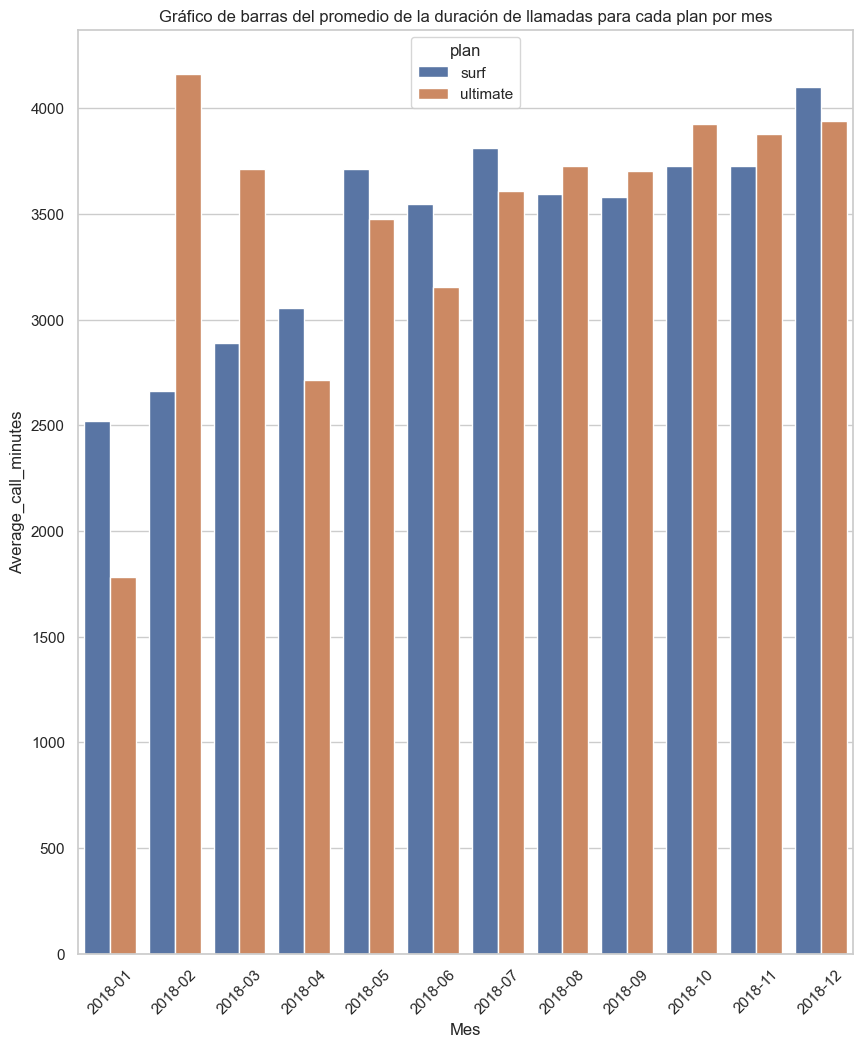

In [25]:
# Comparar la duración promedio de llamadas por cada plan y por cada mes. Trazar un gráfico de barras para visualizarla.

average_call_duration = total_used_per_user.groupby(['month', 'plan'])['call_minutes'].mean().reset_index(name='average_call_minutes')
average_call_duration['average_call_minutes'] = average_call_duration['average_call_minutes'].round(2)

# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear el gráfico de barras
plt.figure(figsize=(10, 12))
barplot = sns.barplot(x='month', y='average_call_minutes', hue='plan', data=average_call_duration)

# Agregar etiquetas y titulo
plt.xlabel('Mes')
plt.ylabel('Average_call_minutes')
plt.title('Gráfico de barras del promedio de la duración de llamadas para cada plan por mes')
plt.xticks(rotation=45)
plt.legend(title='plan')

plt.show()


Podemos concluir, en base a este gráfico de barras, el promedio de duración de llamadas por cada mes de cada plan, de los meses de mayo a diciembre, se concluye que se ve una actividad estable de las llamadas, algunos meses surf tiene un promedio mas alto de llamadas y otras veces ultimate, en febrero ultimate registró un alto número de llamadas, también vemos que diciembre prácticamente los dos planes fueron ocupados de la misma manera, seguro, debido a las fiestas decembrinas los usuarios, estuvieron muy activos en sus teléfonos. 

C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

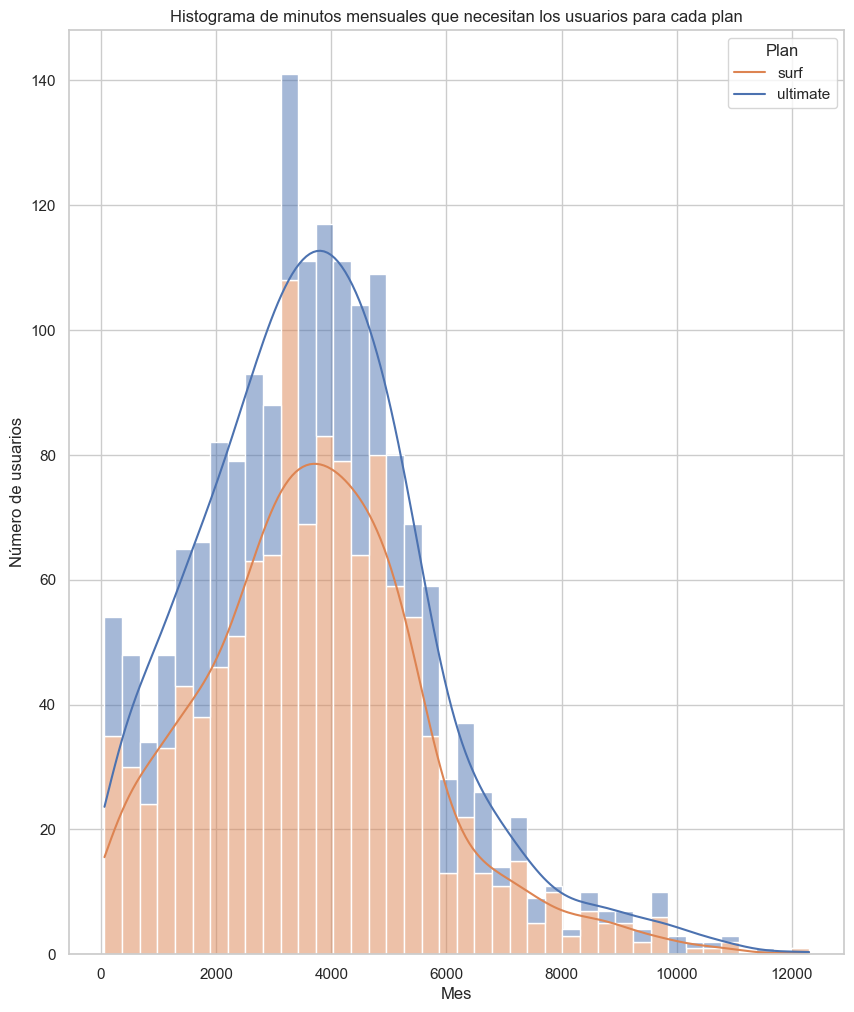

In [26]:
# Comparar el número de minutos mensuales que necesitan los usuarios de cada plan. Trazar un histograma.

# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear el histograma
plt.figure(figsize=(10, 12))
hisplot = sns.histplot(data=total_used_per_user, x='call_minutes', hue='plan', multiple='stack', bins=40, kde=True)

# Agregar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Número de usuarios')
plt.title('Histograma de minutos mensuales que necesitan los usuarios para cada plan')
plt.legend(title='Plan', loc='upper right', labels=['surf', 'ultimate'])
plt.show()


Contrario a la tendencia que vimos en el promedio de consumo por mes de cada plan, aquí vemos otra perspectiva, en todos los bins del histograma vemos, que ultimate es donde mas domina, es decir los usuarios de ultimate ocupan mas minutos, posiblemente esto pasa, porque hay mas usuarios con el plan surf y a la hora de sacar el promedio sube, mas adelante veremos a detalle los consumos de cada plan. 

In [27]:
# Obtención de la media y varianza de la columna `call_minutes` en surf y ultimate
mean_variance_by_plan = total_used_per_user.groupby('plan')['call_minutes'].agg(['mean', 'var']).reset_index()
mean_variance_by_plan.columns =['Plan', 'Media', 'Varianza']
mean_variance_by_plan

,Plan,Media,Varianza
0,surf,3731.796610,3.691818e+06
1,ultimate,3737.202073,4.276690e+06


- Media: La media de la duración de las llamadas es bastante similar para ambos planes, lo que sugiere que, en promedio, los usuarios de ambos planes realizan una cantidad similar de llamadas.

- Varianza: La varianza es un poco más alta para el plan ultimate en comparación con el plan surf. Una mayor varianza indica que hay una mayor dispersión en la duración de las llamadas entre los usuarios del plan ultimate, es decir, algunos usuarios realizan muchas más llamadas que otros.

C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


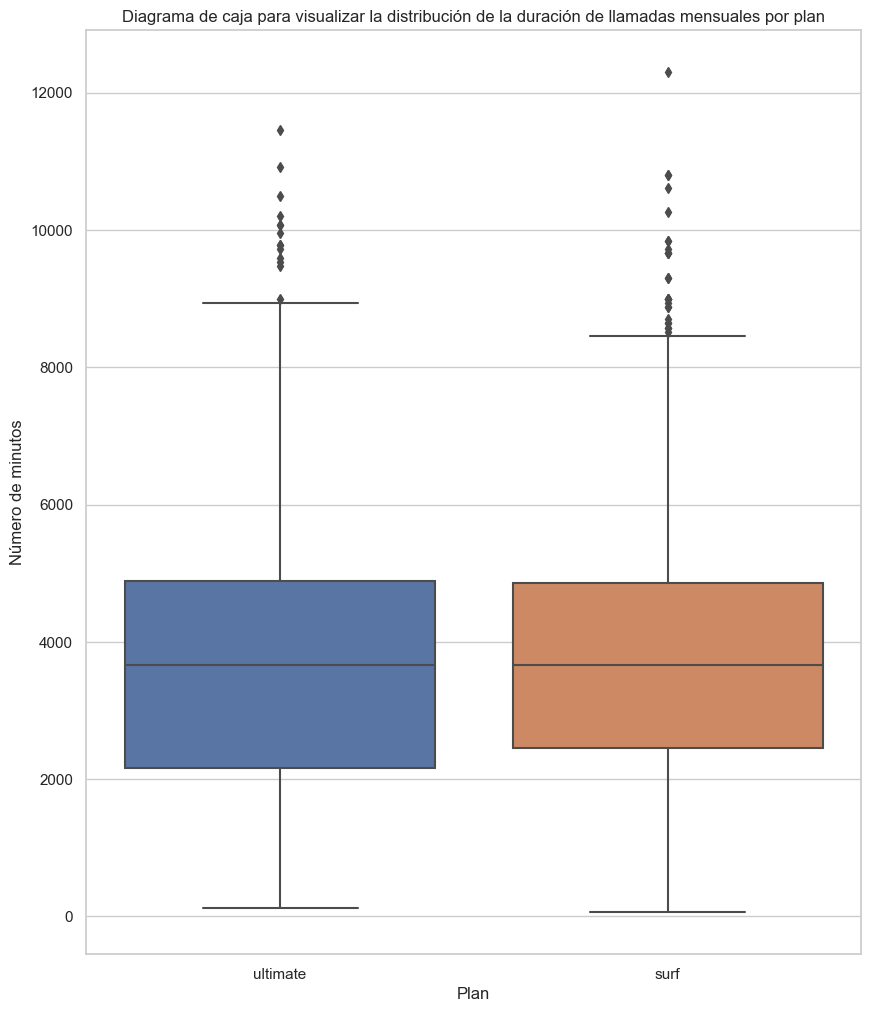

In [28]:
# Trazar un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Creación del boxplot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 12))
boxplot = sns.boxplot(x='plan', y='call_minutes', data=total_used_per_user)

# Definir etiquetas
plt.xlabel('Plan')
plt.ylabel('Número de minutos')
plt.title('Diagrama de caja para visualizar la distribución de la duración de llamadas mensuales por plan')

plt.show()

En este diagrama de caja, notamos que como habíamos concluido antes, la media se encuentra casi a la par en ambos planes, lo que refleja que ambos usuarios de estos planes consumen la misma cantidad de minutos, eso si, cabe destacar, que tanto en surf como en ultimate hay usuarios que consumen muchos mas minutos, y en especial surf, hay un muy reducido grupo con consumos muy altos de minutos en llamadas.

### Consumo de usuario en mensajes por cada plan <a id='messages'></a>

C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

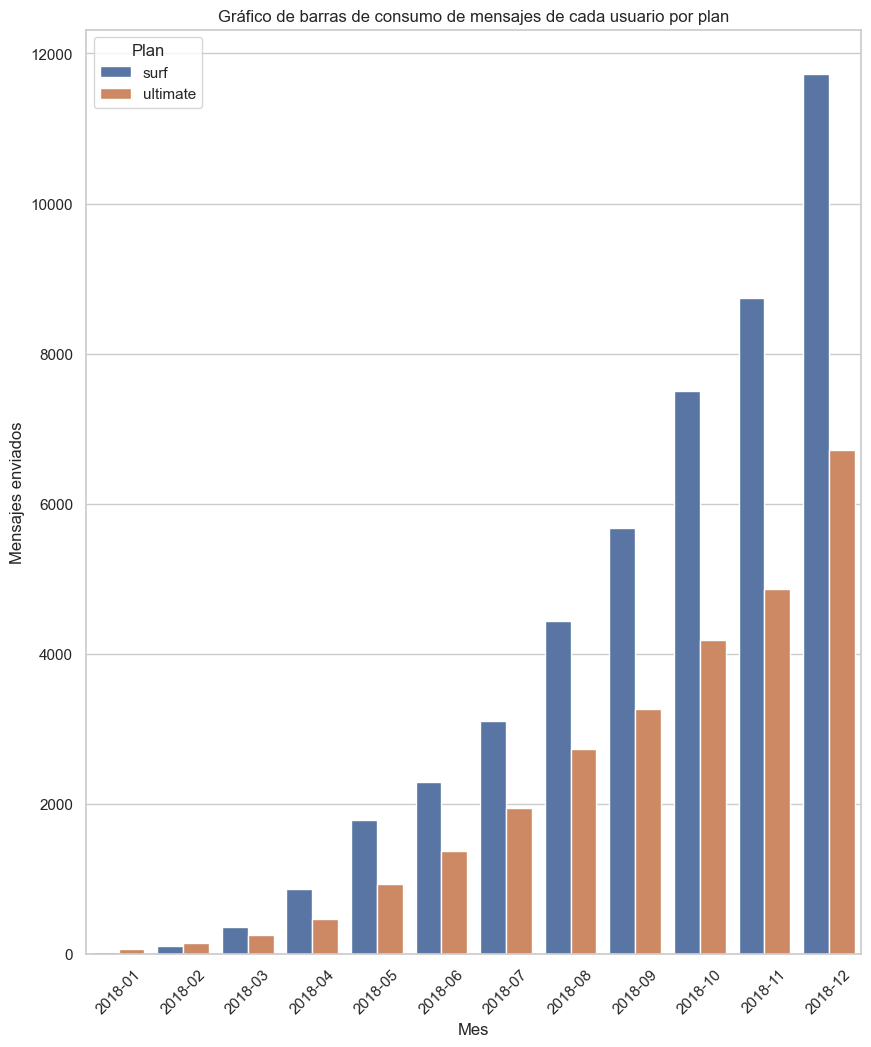

In [29]:
# Consumo de mensajes enviados por usuario y plan por cada mes
messages_used_by_plan = total_used_per_user.groupby(['month', 'plan'])['messages_count'].sum().reset_index()

# Gráfico de barras de la variable `messages_used_by_plan`

sns.set(style='whitegrid')
plt.figure(figsize=(10, 12))
barplot = sns.barplot(x='month', y='messages_count', hue='plan', data=messages_used_by_plan)

# Creación de etiquetas
plt.xlabel('Mes')
plt.ylabel('Mensajes enviados')
plt.title('Gráfico de barras de consumo de mensajes de cada usuario por plan')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()


Se puede concluir, en base a este gráfico de barras, que los usuarios que mas mensajes de texto envían son los que tienen el plan surf, seguro una explicación habrá, y se dirá mas adelante.

### Consumo de usuario en tráfico de internet por cada plan <a id='internet'></a>

C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

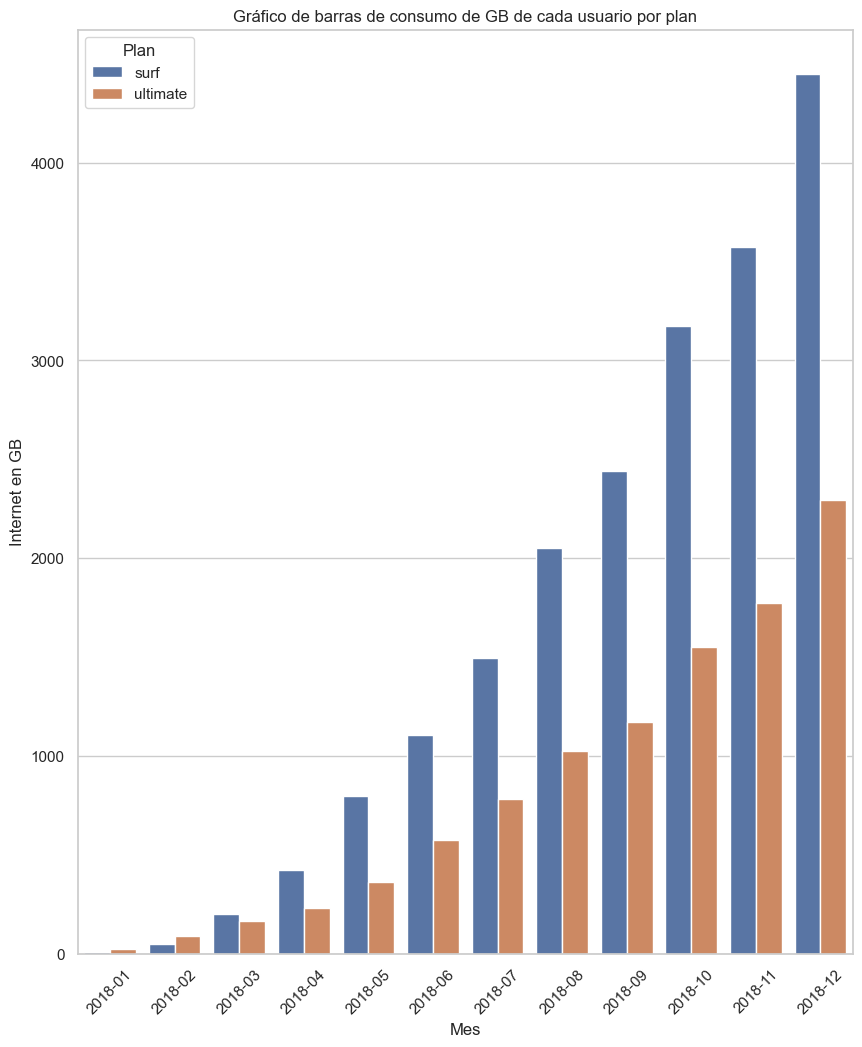

In [30]:
# Consumo de tráfico de internet de los usuarios de cada plan por mes
internet_used_by_plan = total_used_per_user.groupby(['month', 'plan'])['total_gb_used'].sum().reset_index()

# Creación de gráfico de barras de consumo de internet por plan al mes
sns.set(style='whitegrid')
plt.figure(figsize=(10, 12))
barplot = sns.barplot(x='month', y='total_gb_used', hue='plan', data=internet_used_by_plan)

# Creación de etiquetas
plt.xlabel('Mes')
plt.ylabel('Internet en GB')
plt.title('Gráfico de barras de consumo de GB de cada usuario por plan')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()

De acuerdo al gráfico observado, notamos diferencias muy marcadas en el consumo de internet, los usuarios de surf son los que mas consumen, es raro porque estos usuarios de acuerdo a su paquete tienen menos Gb de internet que los del plan ultimate, mas sin embargo no saquemos conclusiones, y sigamos estudiando mas al respecto.

### Ingreso total mensual de cada plan de la empresa Megaline<a id='income'></a>

C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Albert\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

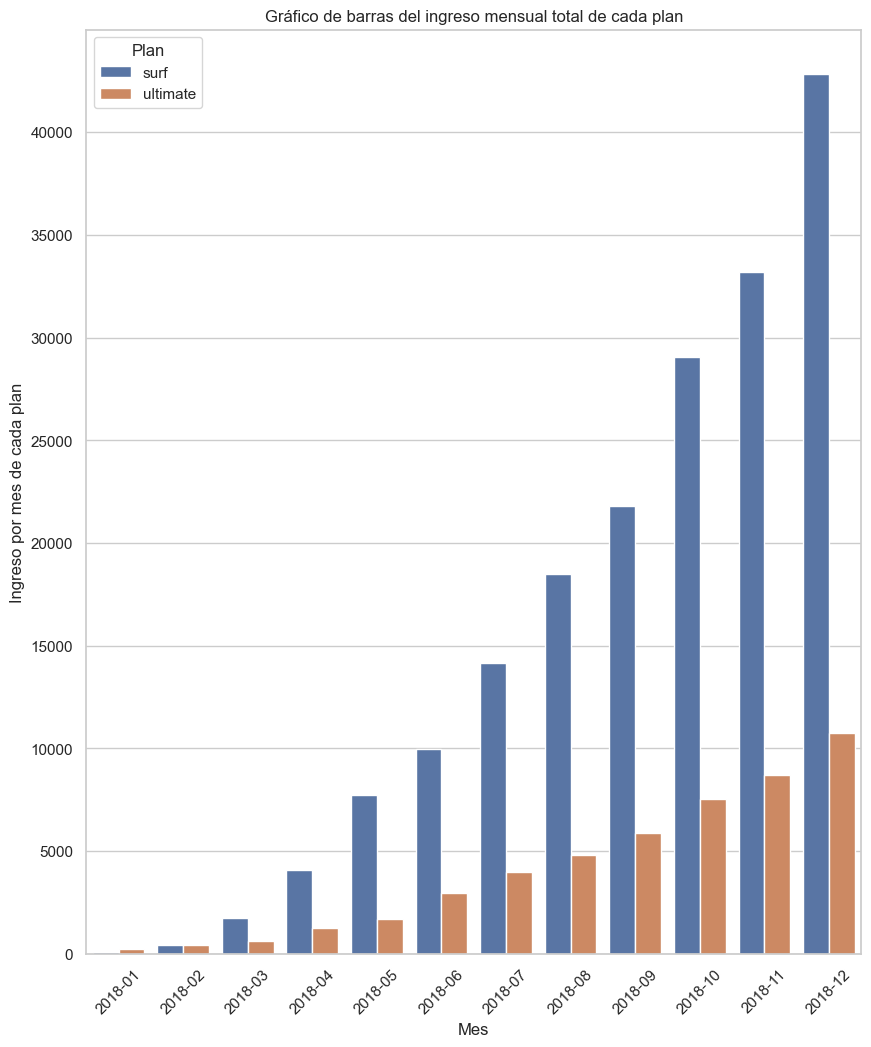

In [31]:
# Ingresos por mes de los planes surf y ultimate en USD
total_income_surf_ultimate = total_used_per_user.groupby(['month', 'plan'])['total_income_monthly'].sum().reset_index()

# Creación del gráfico
sns.set(style='whitegrid')
plt.figure(figsize=(10, 12))
barplot = sns.barplot(x='month', y='total_income_monthly', hue='plan', data=total_income_surf_ultimate)

# Definir las etiquetas
plt.xlabel('Mes')
plt.ylabel('Ingreso por mes de cada plan')
plt.title('Gráfico de barras del ingreso mensual total de cada plan')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.show()


In [32]:
print(df_users['plan'].value_counts())

plan
surf        339
ultimate    161
Name: count, dtype: int64


Después de analizar a detalle los datos, gráficos y un diagrama de cajas, podemos ver que la tarifa surf es la que mas consumo tiene, tanto de llamadas, sms, gb. En cuanto al ingreso, sólo en enero el plan ultimate registró mas ganancias, los 11 meses restantes, surf fue el plan que mas ingresos generó por mucho a megaline. El mes que más ingresos tuvo megaline con surf fue en diciembre, con casi 4, 500 USD, triplicando los ingresos de ultimate. Esto nos deja ver que este plan es el que mas se acopla a los usuarios, debido a que en la tabla `users` podemos ver que de los 500 clientes utilizados para este análisis, 339 pertenecen a surf, lo cual nos deja ver que es la preferida, pasemos ahora, a responder hipótesis.

### Conclusiones de la etapa Análisis de datos <a id='conclusions'></a>

### Conclusiones del Análisis de Datos

#### Gráfico de Barras del Promedio de la Duración de Llamadas para Cada Plan por Mes
- Los usuarios del plan "ultimate" tienen una mayor duración promedio de llamadas en comparación con los usuarios del plan "surf".
- La duración de las llamadas aumenta a lo largo del tiempo para ambos planes.

#### Histograma de Minutos Mensuales que Necesitan los Usuarios para Cada Plan
- Los usuarios del plan "surf" tienden a hacer más llamadas que los del plan "ultimate", reflejado en una mayor frecuencia en las categorías más bajas de minutos mensuales.
- Los usuarios del plan "ultimate" tienen una distribución más amplia de minutos de llamadas mensuales.

#### Diagrama de Caja para Visualizar la Distribución de la Duración de Llamadas Mensuales por Plan
- Los usuarios del plan "ultimate" tienen una mediana ligeramente más alta en la duración de llamadas mensuales en comparación con los usuarios del plan "surf".
- Hay más valores atípicos en el plan "ultimate".

#### Gráfico de Barras del Consumo de Mensajes de Cada Usuario por Plan
- Los usuarios del plan "surf" envían más mensajes que los usuarios del plan "ultimate".
- El consumo de mensajes aumenta de manera constante a lo largo del tiempo para ambos planes.

#### Gráfico de Barras del Consumo de GB de Cada Usuario por Plan
- Los usuarios del plan "surf" consumen más datos (GB) en comparación con los usuarios del plan "ultimate".
- El consumo de datos muestra un crecimiento constante a lo largo del tiempo para ambos planes.

#### Gráfico de Barras del Ingreso Mensual Total de Cada Plan
- El ingreso mensual total de los usuarios del plan "surf" es significativamente mayor que el de los usuarios del plan "ultimate".
- Los ingresos provenientes de los usuarios del plan "surf" muestran un crecimiento más acelerado comparado con los del plan "ultimate".

## Etapa 4: Prueba de Hipótesis <a id='data_hypotesis'></a>

In [33]:
# La hipótesis 1 que tenemos que ver si la rechazamos o no podemos rechazarla es la siguiente:
# El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere

ultimate_income = total_used_per_user[total_used_per_user['plan'] == 'ultimate']['total_income_monthly']
surf_income = total_used_per_user[total_used_per_user['plan'] == 'surf']['total_income_monthly']

# Prueba t de dos muestras independientes
t_stat, p_value = st.ttest_ind(ultimate_income, surf_income)

# Determinación del valor alfa
alpha = 0.05

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula, hay una diferencia significativa entre los ingresos promedios de ultimate y surf.")
else:
    print("No podemos rechazar la hipótesis nula, no hay una diferencia significativa entre los ingresos promedios de ultimate y surf.")

T-statistic: -19.05936683618712
P-value: 9.13353967563062e-74
Rechazamos la hipótesis nula, hay una diferencia significativa entre los ingresos promedios de ultimate y surf.


### Conclusión

Después de realizar una prueba t de dos muestras independientes para comparar los ingresos promedios mensuales de los usuarios de los planes Ultimate y Surf, los resultados nos han proporcionado los siguientes valores:

- **T-statistic**: -19.0593686318712
- **P-value**: 9.13353967563062e-74

El p-value obtenido es extremadamente pequeño, mucho menor que el valor alfa de 0.05 que hemos establecido para nuestra prueba. Esto significa que la probabilidad de observar una diferencia tan extrema como la observada en nuestros datos, bajo la suposición de que la hipótesis nula es cierta, es prácticamente nula.

### Interpretación

Dado que el p-value es significativamente menor que el valor alfa, rechazamos la hipótesis nula. Esto nos lleva a concluir que existe una diferencia significativa entre los ingresos promedios mensuales de los usuarios de los planes Ultimate y Surf.

In [34]:
# La hipótesis 2 que tenemos que ver si la rechazamos o no podemos rechazarla es la siguiente:
# El ingreso promedio de los usuarios en el área de estados `Nueva York` y `Nueva Jersey` es diferente al de los usuarios de otras regiones. 
# Para esto vamos a tener que ocupar merge y obtener la residencia de cada usuario de la tabla `users`.

total_used_per_user = pd.merge(total_used_per_user, df_users[['user_id', 'city']], on=['user_id'], how='left')
total_used_per_user_ny_nj = total_used_per_user[total_used_per_user['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income_monthly']
total_used_per_user_anyplace = total_used_per_user[total_used_per_user['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income_monthly']

# Prueba t de dos muestras independientes
t_stat, p_value = st.ttest_ind(total_used_per_user_ny_nj, total_used_per_user_anyplace)

# Determinación del valor alpha
alpha = 0.05

# Mostrar los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula, hay una diferencia significativa entre los ingresos promedios de NY-NJ y otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula, no hay una diferencia significativa entre los ingresos promedios de NY-NJ y otras regiones.")

T-statistic: 1.1933740390566365
P-value: 0.23288402962848626
No podemos rechazar la hipótesis nula, no hay una diferencia significativa entre los ingresos promedios de NY-NJ y otras regiones.


Después de realizar una prueba t de dos muestras independientes para comparar los ingresos promedios mensuales de los usuarios en el área de Nueva York y Nueva Jersey (NY-NJ) con los de otras regiones, obtuvimos los siguientes resultados:

- **T-statistic**: 1.1933740390566365
- **P-value**: 0.23288402962848626

El p-value obtenido es 0.23288402962848626, que es mayor que el valor alfa de 0.05. Esto indica que no hay suficiente evidencia para rechazar la hipótesis nula.

### Interpretación
Dado que el p-value es mayor que el valor alfa, no podemos rechazar la hipótesis nula. Esto significa que no encontramos una diferencia significativa entre los ingresos promedios mensuales de los usuarios de NY-NJ y los de otras regiones. En otras palabras, los ingresos promedios mensuales de los usuarios de las tarifas en NY-NJ no son significativamente diferentes de los ingresos promedios mensuales de los usuarios de otras regiones.

### Hipótesis Formuladas
- **Hipótesis nula ( \(H_0\) )**: El ingreso promedio de los usuarios en el área de NY-NJ es igual al ingreso promedio de los usuarios de otras regiones.
- **Hipótesis alternativa ( \(H_1\) )**: El ingreso promedio de los usuarios en el área de NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.

Dado que no podemos rechazar la hipótesis nula, concluimos que no hay una diferencia significativa en los ingresos promedios entre las dos regiones comparadas.

## Conclusiones del proyecto <a id='final_conclusion'></a>

### Resumen del Proyecto
En este proyecto, analizamos y evaluamos diversos aspectos del uso de los servicios de telecomunicaciones por parte de los usuarios de diferentes planes tarifarios de la empresa megaline. Se utilizaron datos de seis tablas para llevar a cabo un análisis exhaustivo y llegar a conclusiones significativas sobre el comportamiento y los ingresos generados por los usuarios de los planes Surf y Ultimate.

### Tablas Utilizadas
1. **Usuarios (df_users)**: Información sobre los usuarios, incluyendo su ID, nombre, edad, ciudad, fecha de registro y plan de tarifas.
2. **Llamadas (calls)**: Datos sobre las llamadas realizadas por los usuarios, incluyendo la duración de las llamadas y la fecha.
3. **Mensajes (messages)**: Información sobre los mensajes enviados por los usuarios, incluyendo la fecha.
4. **Internet (internet)**: Datos sobre el uso de internet por parte de los usuarios, incluyendo la cantidad de tráfico utilizado y la fecha.
5. **Plan(planes)**: Datos sobre los planes surf y megaline
6. **Ingresos Mensuales (total_used_per_user)**: Información consolidada sobre el uso de servicios y los ingresos mensuales generados por cada usuario.

### Principales Análisis Realizados
1. **Comparación de la Duración Promedio de Llamadas por Plan**:
   - Se comparó la duración promedio de las llamadas realizadas por los usuarios de los planes "Ultimate" y "Surf" mediante un gráfico de barras.
   - Conclusión: No se encontraron diferencias significativas en la duración promedio de las llamadas entre los dos planes.

2. **Análisis del Número de Minutos Mensuales Utilizados**:
   - Se visualizó la distribución del número de minutos de llamadas mensuales por plan mediante un histograma.
   - Conclusión: La distribución de los minutos utilizados muestra que los usuarios de ambos planes tienen comportamientos de uso distintos.

3. **Evaluación del Ingreso Promedio por Plan**:
   - Se realizó una prueba t de dos muestras independientes para comparar los ingresos promedios mensuales generados por los usuarios de los planes "Ultimate" y "Surf".
   - Conclusión: Se encontró una diferencia significativa entre los ingresos promedios de los dos planes, con los usuarios del plan "Ultimate" generando ingresos significativamente mayores.

4. **Análisis Regional del Ingreso Promedio**:
   - Se evaluó si el ingreso promedio de los usuarios en el área de Nueva York y Nueva Jersey (NY-NJ) es diferente al de los usuarios de otras regiones.
   - Conclusión: No se encontró una diferencia significativa entre los ingresos promedios de los usuarios en NY-NJ y los de otras regiones.

### Conclusiones Generales
- **Diferencias en Ingresos por Plan**: Los usuarios del plan "Surf" generan ingresos significativamente mayores en comparación con los usuarios del plan "Ultimate". Esto puede deberse a diferencias en las tarifas, beneficios incluidos en cada plan, patrones de uso, o mayores usuarios en el plan "Surf" 
- **Impacto Regional Insignificante**: La ubicación geográfica de los usuarios, específicamente si están en el área de NY-NJ o en otras regiones, no parece tener un impacto significativo en los ingresos promedios generados por los usuarios. Esto indica que los planes tarifarios y los patrones de uso son consistentes en diferentes regiones.

### Recomendaciones
- **Revisión de Tarifas y Beneficios**: Considerar la revisión de las tarifas y beneficios incluidos en los planes para optimizar los ingresos y atraer a más usuarios a planes más rentables.








